# **ALGORITMO DE GROVER E AMPLIFICAÇÃO DE AMPLITUDE**

<br>

- <a href="https://qiskit.org/documentation/tutorials/algorithms/06_grover.html"> Refencia Qiskit </a><br>
- <a href="https://quantum-computing.ibm.com/composer/docs/iqx/guide/grovers-algorithm#example-two-qubits"> Grover circuit </a><br>
<br>
<br>

### **MOTIVAÇÃO**
<br>

<p style="text-indent: 3ch">O Problema do Caixeiro Viajante, do inglês Traveling Salesman Problem (TSP) é um clássico problema quando se estuda otimização combinatória e teoria de grafos. A atração por esse problema é notada por sua interdisciplinaridade e importância econômica com diversas, com uma gama de aplicações em diversas áreas, principalmente em setores do ramo da logística. Por exemplo uma empresa de entregas tem alguns endereços para enviar os produtos e deseja fazer isso da melhor forma possível de forma que seja economizado tempo e custos de viajem no processo.</p>

#### **ALGORITMO DE GROVER**


<p style="text-indent: 3ch">O algoritmo de Grover demonstra essa capacidade. Esse algoritmo pode acelerar quadraticamente um problema de pesquisa não estruturada, mas seus usos vão além disso; pode servir como um truque geral ou sub-rotina para obter melhorias de tempo de execução quadráticas para uma variedade de outros algoritmos. Isso é chamado de truque de amplificação de amplitude . Mas antes de começarmos as simulações, vamos dar uma olhada no problema de busca não estruturada.</p>

In [80]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from numpy import pi

#Grover 00


qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# A operação de reset retorna um qubit para o estado ∣ 0 ⟩, 
# independentemente de seu estado antes da aplicação da operação. Não é uma operação reversível.

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])

# O portão H, ou Hadamard, gira os estados∣ 0 ⟩ e∣ 1 ⟩ para∣ + ⟩ e ∣ − ⟩, respectivamente.
# É útil para fazer superposições. Se você tiver um portão universal definido em um computador clássico
# e adicionar o portão Hadamard, ele se tornará um portão universal definido em um computador quântico.

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])



circuit.s(qreg_q[0])
circuit.s(qreg_q[1])
circuit.s(qreg_q[2])


# Portão Z controlado.
# Na base computacional, este portão inverte a fase do qubit de destino se o qubit de controle estiver no ∣ 1 ⟩ Estado.
# https://qiskit.org/documentation/stubs/qiskit.circuit.library.CZGate.html

circuit.cz(qreg_q[0], qreg_q[1])

circuit.s(qreg_q[0])
circuit.s(qreg_q[1])
circuit.s(qreg_q[2])

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

# A porta NOT, também conhecida como porta Pauli X, vira o ∣ 0 ⟩estado para ∣ 1 ⟩, e vice versa. A porta NOT é equivalente a RX para o ângulo π.

circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])

circuit.cz(qreg_q[0], qreg_q[1])

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[2])


circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

In [81]:
simulator = QasmSimulator()

compiled_circuit = transpile(circuit,simulator)

job = simulator.run(compiled_circuit, shots=100)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'000': 100}


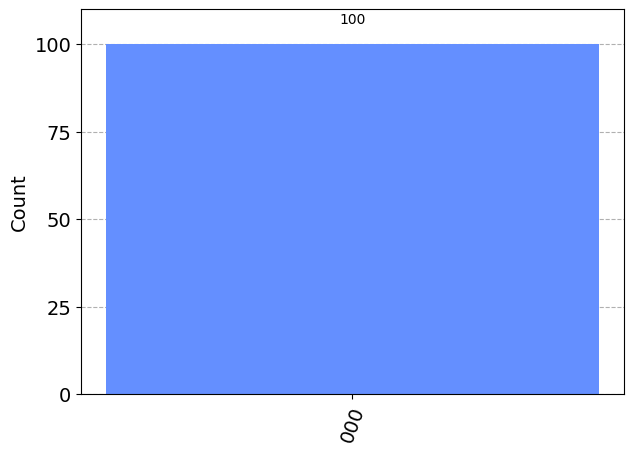

In [82]:
plot_histogram(counts)

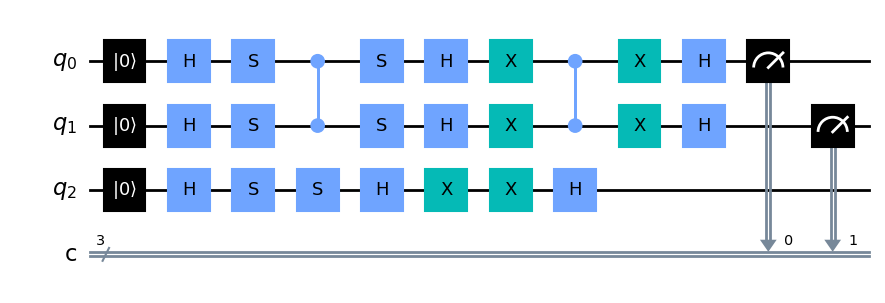

In [83]:
circuit.draw(output='mpl') 

In [84]:
#Grover 01


qreg_q_2 = QuantumRegister(2, 'q')
creg_c_2 = ClassicalRegister(2, 'c')
circuit_2 = QuantumCircuit(qreg_q_2, creg_c_2)

circuit_2.reset(qreg_q_2[0])
circuit_2.reset(qreg_q_2[1])
circuit_2.h(qreg_q_2[0])
circuit_2.h(qreg_q_2[1])
circuit_2.s(qreg_q_2[0])
circuit_2.cz(qreg_q_2[0], qreg_q_2[1])
circuit_2.s(qreg_q_2[0])
circuit_2.h(qreg_q_2[1])
circuit_2.h(qreg_q_2[0])
circuit_2.x(qreg_q_2[1])
circuit_2.x(qreg_q_2[0])
circuit_2.cz(qreg_q_2[0], qreg_q_2[1])
circuit_2.x(qreg_q_2[0])
circuit_2.h(qreg_q_2[0])
circuit_2.x(qreg_q_2[1])
circuit_2.h(qreg_q_2[1])
circuit_2.measure(qreg_q_2[0], creg_c_2[0])
circuit_2.measure(qreg_q_2[1], creg_c_2[1])

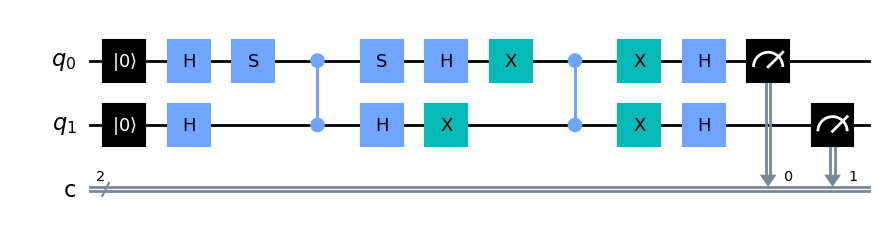

In [85]:
circuit_2.draw(output='mpl')

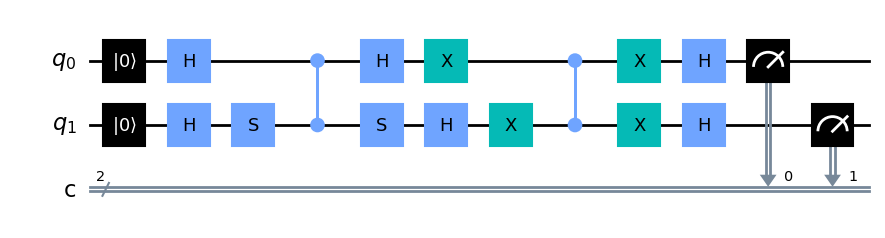

In [86]:
#Grover 10

qreg_q_3 = QuantumRegister(2, 'q')
creg_c_3 = ClassicalRegister(2, 'c')
circuit_3 = QuantumCircuit(qreg_q_3, creg_c_3)

circuit_3.reset(qreg_q_3[0])
circuit_3.reset(qreg_q_3[1])
circuit_3.h(qreg_q_3[0])
circuit_3.h(qreg_q_3[1])
circuit_3.s(qreg_q_3[1])
circuit_3.cz(qreg_q_3[0], qreg_q_3[1])
circuit_3.h(qreg_q_3[0])
circuit_3.s(qreg_q_3[1])
circuit_3.x(qreg_q_3[0])
circuit_3.h(qreg_q_3[1])
circuit_3.x(qreg_q_3[1])
circuit_3.cz(qreg_q_3[0], qreg_q_3[1])
circuit_3.x(qreg_q_3[0])
circuit_3.h(qreg_q_3[0])
circuit_3.x(qreg_q_3[1])
circuit_3.h(qreg_q_3[1])
circuit_3.measure(qreg_q_3[0], creg_c_3[0])
circuit_3.measure(qreg_q_3[1], creg_c_3[1])

circuit_3.draw(output='mpl')

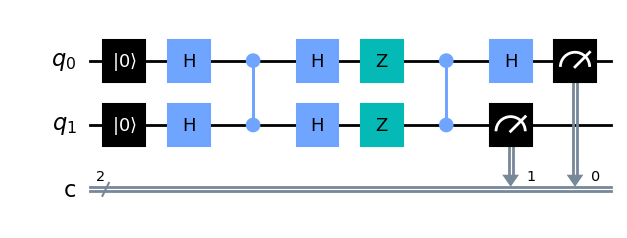

In [87]:
#Grover 11 ERROR

qreg_q_4 = QuantumRegister(2, 'q')
creg_c_4 = ClassicalRegister(2, 'c')
circuit_4 = QuantumCircuit(qreg_q_4, creg_c_4)

circuit_4.reset(qreg_q_4[0])
circuit_4.reset(qreg_q_4[1])
circuit_4.h(qreg_q_4[0])
circuit_4.h(qreg_q_4[1])
circuit_4.cz(qreg_q_4[1], qreg_q_4[0])
circuit_4.h(qreg_q_4[0])
circuit_4.h(qreg_q_4[1])
circuit_4.z(qreg_q_4[0])
circuit_4.z(qreg_q_4[1])
circuit_4.cz(qreg_q_4[1], qreg_q_4[0])
circuit_4.h(qreg_q_4[0])
circuit_4.measure(qreg_q_4[0], creg_c_4[0])
circuit_4.measure(qreg_q_4[1], creg_c_4[1])

circuit_4.draw(output='mpl')

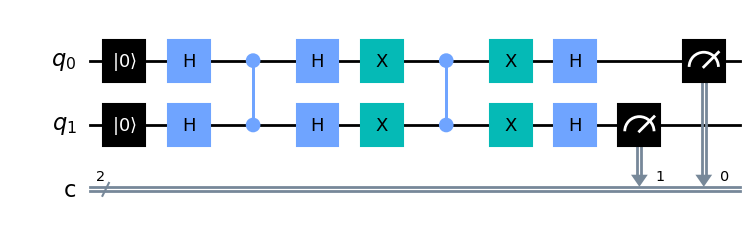

In [88]:
qreg_q_5 = QuantumRegister(2, 'q')
creg_c_5 = ClassicalRegister(2, 'c')
circuit_5 = QuantumCircuit(qreg_q_5, creg_c_5)

circuit_5.reset(qreg_q_5[0])
circuit_5.reset(qreg_q_5[1])
circuit_5.h(qreg_q_5[0])
circuit_5.h(qreg_q_5[1])
circuit_5.cz(qreg_q_5[1], qreg_q_5[0])
circuit_5.h(qreg_q_5[0])
circuit_5.h(qreg_q_5[1])
circuit_5.x(qreg_q_5[0])
circuit_5.x(qreg_q_5[1])
circuit_5.cz(qreg_q_5[1], qreg_q_5[0])
circuit_5.x(qreg_q_5[0])
circuit_5.x(qreg_q_5[1])
circuit_5.h(qreg_q_5[0])
circuit_5.h(qreg_q_5[1])
circuit_5.measure(qreg_q_5[1], creg_c_5[1])
circuit_5.measure(qreg_q_5[0], creg_c_5[0])

circuit_5.draw(output='mpl')

In [89]:
simulator = QasmSimulator()

compiled_circuit = transpile(circuit_5,simulator)

job = simulator.run(compiled_circuit, shots=100)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 100}


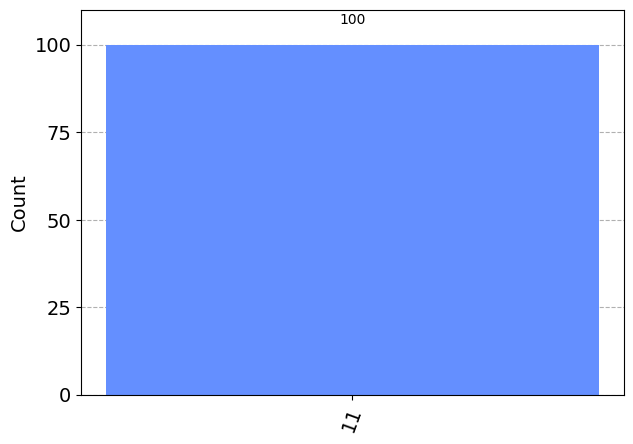

In [90]:
plot_histogram(counts)